## 공간데이터 전처리: GPX 트랙 데이터가 숲길 영역에 얼마나 겹쳐있는지 파악
 - 트랙데이터가 숲길 영역(50m 버퍼)에 얼마나 겹쳐있는지 파악 가능함
 - 트랭글 데이터로, 분석 대상 숲길 코스를 그 사람이 실제로 이용했는지 파악 가능함

### 로우코드
### 1. 파일 불러오기 및 좌표계 변환

In [28]:
import geopandas
import dask_geopandas
import gpxpy

In [3]:
geopandas.options

Options(
  display_precision: None [default: None]
      The precision (maximum number of decimals) of the coordinates in the
      WKT representation in the Series/DataFrame display. By default (None),
      it tries to infer and use 3 decimals for projected coordinates and 5
      decimals for geographic coordinates.
  use_pygeos: False [default: False]
      Deprecated option previously used to enable PyGEOS. It will be removed
      in GeoPandas 1.1.
  io_engine: None [default: None]
      The default engine for ``read_file`` and ``to_file``. Options are
      'pyogrio' and 'fiona'.
  )

In [85]:
#read file
gdf = geopandas.read_file(r"C:\Users\user\Desktop\sj\sj_trail.shp")
gdf.head()

,fid,id,name,ë ¸ì ëª,êµ¬ê°ëª,êµ¬ê°ê±°ï,ì êµ¬ìï,ìë´íï,ë¶ê¸°ê°ï,íê· ê²½ï,...,ì ì(ï¿½,ì ì(êµ¬,ì ì(ë ¸,ì ì(ï_1,ì ì(ì,ì ìí©ï,ì²ê¸¸ì´ï,ì ìï¿½ï,ì²ê¸¸ï¿½ï,geometry
0,1.0,1.0,ì ìë ¹ìíë±ì°ë¡_ì êµ¬_ìë¼ëª©ì¥ì...,ì ìë ¹ìíë±ì°ë¡,ì êµ¬_ìë¼ëª©ì¥ì¼ê±°ë¦¬,1.22,1.0,3,1.0,10.1,...,8,3,6,3,2,26,3,22,2,"LINESTRING (355002.062 566611.799, 355008.617 ..."
1,2.0,6.0,ì ìë ¹ìíë±ì°ë¡_KTëê´ë ¹ì¤ê°ì_...,ì ìë ¹ìíë±ì°ë¡,KTëê´ë ¹ì¤ê°ì_ì êµ¬ìë´í,1.27,1.0,10,NaN,10.5,...,8,3,4,2,1,22,2,18,2,"LINESTRING (355135.425 566660.258, 355138.466 ..."
2,3.0,7.0,ì ìë ¹ìíë±ì°ë¡_êµ­ì¬ì±í©ë¹_íí...,ì ìë ¹ìíë±ì°ë¡,êµ­ì¬ì±í©ë¹_íí´ì¡°ë¦¼ì§,0.38,1.0,3,4.0,8.1,...,4,3,4,1,3,19,2,15,1,"LINESTRING (354737.964 567691.635, 354729.036 ..."
3,4.0,8.0,ì ìë ¹ìíë±ì°ë¡_ì ìë ¹ìíë±ì°...,ì ìë ¹ìíë±ì°ë¡,ì ìë ¹ìíë±ì°ë¡_ì¬ìê¸¸,0.22,1.0,2,2.0,8.1,...,4,3,2,1,2,16,2,12,1,"LINESTRING (355103.787 567341.558, 355091.561 ..."
4,5.0,9.0,ì ìë ¹ìíë±ì°ë¡_ëê´ë ¹ì ë§ë,ì ìë ¹ìíë±ì°ë¡,ëê´ë ¹ì ë§ë,0.50,1.0,2,2.0,6.4,...,4,3,6,3,2,22,2,18,2,"LINESTRING (354702.981 568438.288, 354692.902 ..."


In [22]:
gdf.crs

<Projected CRS: PROJCS["Korea_2000_Korea_Central_Belt_2010",GEOGCS ...>
Name: Korea_2000_Korea_Central_Belt_2010
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Korean_Geodetic_Datum_2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
if gdf.crs.to_epsg() == 5186:
    pass  # 이미 해당 좌표계
else:
    gdf = gdf.to_crs("EPSG:5186")


In [86]:
print (gdf.crs.to_epsg())

None


<Axes: >

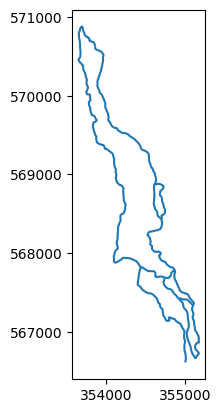

In [23]:
gdf.plot()

In [24]:
gdf_buffer=gdf.buffer(50)

In [66]:
buffers = gdf_buffer.unary_union

C:\Users\user\AppData\Local\Temp\ipykernel_7192\2332803462.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffers = gdf_buffer.unary_union


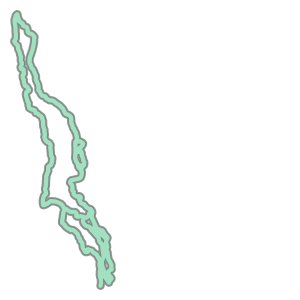

In [67]:
buffers

In [71]:
file_path = "done_2936"
test_gpx = geopandas.read_file(rf"C:\Users\user\Desktop\GPX\{file_path}.gpx", layer='tracks')
test_gpx

,name,cmt,desc,src,link1_href,link1_text,link1_type,link2_href,link2_text,link2_type,number,type,geometry
0,None,None,None,None,None,None,None,None,None,None,NaN,None,"MULTILINESTRING ((128.75412 37.68483, 128.7541..."


In [72]:
test_gpx.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [73]:
test_gpx = test_gpx.to_crs("EPSG:5186")

In [74]:
test_gpx.crs

<Projected CRS: EPSG:5186>
Name: KGD2002 / Central Belt 2010
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore between 126°E and 128°E.
- bounds: (126.0, 33.14, 128.0, 38.33)
Coordinate Operation:
- name: Korea Central Belt 2010
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

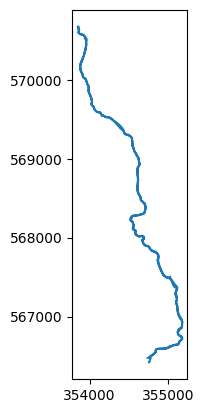

In [75]:
test_gpx.plot()

### 2. gpx 전체 길이 계산 후 buffer 내 몇 % 속하는지 반환

In [76]:
# gpx 파일 1개의 전체 길이 반환
test_gpx['length'] = test_gpx.geometry.length
total_length = test_gpx['length'].sum()

print(total_length)

11222.05212135368


In [77]:
# 버퍼 내에 겹치는 구간 길이 계산
from shapely import intersection

clipped = test_gpx.geometry.intersection(buffers)
clipped_length = clipped.length

print(clipped_length)

0    10546.654251
dtype: float64


In [78]:
# 퍼센트로 반환 및 새 데이터 프레임 생성
import pandas as pd
import numpy as np

percent_data = clipped_length / total_length * 100
print(percent_data)

0    93.981512
dtype: float64


In [80]:
import os
import re

df = pd.DataFrame([{
    'file_name': file_path,
    'total_length' : total_length.item(),
    'clipped_length': clipped_length.item(), 
    'percent' : percent_data.item()
}])

df

,file_name,total_length,clipped_length,percent
0,done_2936,11222.052121,10546.654251,93.981512


### 모든 GPX데이터 대상으로 가능하게 모듈화

In [1]:
# import packages
# 라이브러리 임포트

from pathlib import Path
import pandas as pd
import geopandas as gpd
from shapely import intersection

In [2]:
# set data path 
# 데이터 경로 설정

forest_path = r"C:\Users\user\Desktop\sj\sj_trail.shp"
folder_name = r"C:\Users\user\Desktop\GPX"

In [3]:
# change projection & set buffer of forest trail
# 숲길 코스 좌표계 변환 및 버퍼 설정

forest_gdf = gpd.read_file(forest_path)

# 좌표계가 위경도좌표계일 경우 아래 코드 실행해 원하는 좌표계로 수정
# forest_gdf = forest_gdf.to_crs("EPSG: 5186")

buffers = forest_gdf.buffer(50) # radius 50m
forest_buffer = buffers.unary_union

C:\Users\user\AppData\Local\Temp\ipykernel_10848\2164162007.py:10: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  forest_buffer = buffers.unary_union


In [5]:
# get gpx track data & calculation clipped length
# 숲길 영역 데이터와 겹치는 gpx 경로 길이 계산

def analyze_gpx(folder_name, buffers, crs_epsg="EPSG:5186"):

    results = []
    error_log = [] 
    folder_path = Path(folder_name)
    
    for file in folder_path.glob("*.gpx"):
        file_name = file.stem
        
        try:
            gdf = gpd.read_file(file, layer='tracks') 
            
            gdf = gdf.to_crs(crs_epsg) # reprojection
            
            gdf['length'] = gdf.geometry.length # gpx track length
            total_length = gdf['length'].sum()
            
            clipped = gdf.geometry.intersection(buffers) # clipped length
            clipped_length = clipped.length.sum()
            
            percent = (clipped_length / total_length * 100) if total_length > 0 else 0 
            
            results.append({
                'file_name': file_name,
                'total_length': total_length.item(),
                'clipped_length': clipped_length.item(),
                'percent': percent
            })
        
        except Exception as e:  # 오류설정
            error_log.append((file_name, str(e)))
            continue
        
    error_df = pd.DataFrame(error_log, columns=["file_name", "error_message"])
        
    return pd.DataFrame(results), error_df

df_result, df_error = analyze_gpx(folder_name, forest_buffer)
df_result.head(5)

,file_name,total_length,clipped_length,percent
0,done_2936,11222.052121,10546.654251,93.981512
1,done_653,395.691174,0.000000,0.000000


In [6]:
# save the result
df_result.to_csv("result_file")
df_error.to_csv("error_files")